In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import os
import numpy as np
import glob
import pytesseract
import cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
# nltk.download('words')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
  
lm = WordNetLemmatizer()
# words = set(nltk.corpus.words.words())
sw = set(stopwords.words('english'))
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
# from tensorflow.keras.applications.vgg16 import VGG16
# from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
import re
from sklearn.metrics import confusion_matrix, accuracy_score
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

def imShow(path):
    image = cv2.imread(path)
    height, width = image.shape[:2]
    resized_image = cv2.resize(image, (3*width, 3*height), interpolation=cv2.INTER_CUBIC)

    fig = plt.gcf()
    fig.set_size_inches(18, 10)
    plt.axis("off")
    plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
    plt.show()

[nltk_data] Downloading package stopwords to /home/rsingh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/rsingh/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
data = pd.read_csv("/home/agiri/new/Invoice_discharge_data.csv")
df = data['choice image'.split()].drop_duplicates().dropna().reset_index(drop = True)
df.columns = ['labels', 'Image_Path']
df = df['Image_Path labels'.split()]

In [ ]:
import shutil
import os
pd.options.display.max_colwidth = 500

In [ ]:
df.head(1)

In [ ]:
path = "/home/dkuwarbi/docI/images_forged/"
df['Image_Path'] =  df['Image_Path'].apply(lambda x: path+x.split("/")[-1])

In [ ]:
df.head(2)

In [ ]:
imShow("/home/dkuwarbi/docI/images_forged/210000083PFee- Invoice - 2388_0.jpg")

In [ ]:
import pytesseract as pt
# os.environ["CUDA_VISIBLE_DEVICES"] = "1"
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

In [ ]:
def clean(text):
    # strip leading and trailing whitespace
    text = text.strip()
    
    
    return text



In [ ]:
from tqdm import tqdm 
tqdm.pandas()

In [ ]:
for i in tqdm(range(df.shape[0])):
    # extract text from image
    text = pt.image_to_string(df.loc[i, "Image_Path"])
    
    # clean the extracted text
    text = clean(text)
    
    # assign cleaned text to DataFrame
    df.loc[i, "text"] = text

In [ ]:
df.head(2)

In [ ]:
df.text = df['text'].progress_apply(lambda x:  x.replace("\n", ""))

In [ ]:
pd.options.display.max_colwidth = 50
df.head(2)

In [30]:
# df.to_csv("tesseract.csv")
df = pd.read_csv('tesseract.csv')

In [32]:
df = df.dropna()

In [33]:
df['labels'].value_counts()

Discharge_Summary    190
Invoice              188
Name: labels, dtype: int64

In [34]:
df['text'].isna().sum()

0

In [35]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.1, random_state=42, stratify=df['labels'])

In [36]:
train_df, eval_df = train_test_split(train_df, test_size=0.2, random_state=42, stratify=train_df['labels'])

In [37]:
df.shape, train_df.shape, eval_df.shape, test_df.shape

((378, 4), (272, 4), (68, 4), (38, 4))

In [38]:
train_df['labels'].value_counts()

Discharge_Summary    137
Invoice              135
Name: labels, dtype: int64

In [39]:
test_df['labels'].value_counts()

Invoice              19
Discharge_Summary    19
Name: labels, dtype: int64

In [40]:
labels = df.labels.unique()
print(f"Total numbers of labels: {len(labels)}")
print(f"Label Names: {labels}")

Total numbers of labels: 2
Label Names: ['Invoice' 'Discharge_Summary']


In [41]:
label2idx = {label:i for i, label in enumerate(labels)}
label2idx

{'Invoice': 0, 'Discharge_Summary': 1}

In [42]:
from tqdm import tqdm 
tqdm.pandas()
train_df["labels"] = train_df["labels"].progress_apply(lambda x: label2idx.get(x))
eval_df["labels"] = eval_df["labels"].progress_apply(lambda x: label2idx.get(x))
test_df["labels"] = test_df["labels"].progress_apply(lambda x: label2idx.get(x))

100%|██████████| 38/38 [00:00<00:00, 30146.31it/s]


In [43]:
df.isna().sum()

Unnamed: 0    0
Image_Path    0
labels        0
text          0
dtype: int64

In [44]:
train_df.head()

,Unnamed: 0,Image_Path,labels,text
0,0,/home/dkuwarbi/docI/images_forged/210000083PFe...,0,"C MacCoy Consultancy ies es: Krishna Nagar,Ser..."
70,70,/home/dkuwarbi/docI/images_forged/210014237P f...,0,HN +1$O 9001:2008 CERTIFIED COMPANY(Establish ...
259,259,/home/dkuwarbi/docI/images_forged/OC-22-1002-6...,0,—~BOMBAY HOSPITAL& iMEDICAL RESEARCH CENTRE 42...
198,198,/home/dkuwarbi/docI/images_forged/OC-22-1002-6...,1,"J col: UOISSIWPe JO aw} ay} Je UOHBUIWeXa ""|je..."
241,241,/home/dkuwarbi/docI/images_forged/OC-22-1002-6...,0,+1 BESOEEsesusk3eupipay“1880¥ZSPINS AT= ~~sofi...


# Backbones

In [45]:
from sentence_transformers import SentenceTransformer, util, models, losses, datasets
from transformers import AutoTokenizer, AutoFeatureExtractor, AutoModel
import torchvision.transforms as T
import torch
device = "cuda:0" if torch.cuda.is_available() else "cpu"

In [46]:
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [47]:
word_embedding_model = models.Transformer('sentence-transformers/all-mpnet-base-v2', max_seq_length=512)
pooling_model = models.Pooling(word_embedding_model.get_word_embedding_dimension(), 'cls')
text_encoder = SentenceTransformer(modules=[word_embedding_model, pooling_model])

for p in text_encoder.parameters():
    p.requires_grad = False

In [86]:
text_encoder.save(text_encoder)

In [48]:
image_encoder = SentenceTransformer("sentence-transformers/clip-ViT-L-14", device=device)

for p in image_encoder.parameters():
    p.requires_grad = False

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


In [49]:
from PIL import Image
from torch import nn
from torch.utils.data import DataLoader, Dataset, RandomSampler, SequentialSampler

In [50]:
class EasyVQADataset(Dataset):
    def __init__(self, df, image_encoder, text_encoder):
        
        self.df = df
        self.image_encoder = image_encoder
        self.text_encoder = text_encoder
        # self.image_processor = image_processor
        # self.tokenizer = tokenizer
    
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, idx):
        
        image_path = self.df['Image_Path'][idx]
        question = self.df['text'][idx]
        label = self.df['labels'][idx]
        image = Image.open(image_path).convert("RGB")
        image_embedding = self.image_encoder.encode(image, convert_to_tensor=True, device=device)
        image_embedding = image_embedding.detach()

#         image_inputs = self.image_processor(image, return_tensors="pt")
#         image_inputs = image_inputs.to(device)
#         image_outputs = self.image_encoder(**image_inputs)
#         image_embedding = image_outputs.pooler_output
#         image_embedding = image_embedding.view(-1)
#         image_embedding = image_embedding.detach()
#         # print(f"Image Embedding Shape: {image_embedding.shape}")
        text_embedding = self.text_encoder.encode(question, convert_to_tensor=True, device=device)
        text_embedding = text_embedding.detach()

        # text_inputs = self.tokenizer(question, return_tensors="pt", truncation=True, padding="max_length")
        # text_inputs = text_inputs.to(device)
        # text_outputs = self.text_encoder(**text_inputs)
        # text_embedding = text_outputs.pooler_output
        # text_embedding = text_embedding.view(-1)
        # text_embedding = text_embedding.detach()
        # # print(f"Text Embedding Shape: {text_embedding.shape}")
        
        encoding = {}
        encoding['image_embd'] = image_embedding
        encoding['text_embd'] = text_embedding
        encoding['label'] = torch.tensor(label)
        
        return encoding

In [51]:
train_df.reset_index(drop=True, inplace=True)
eval_df.reset_index(drop=True, inplace=True)

train_dataset = EasyVQADataset(train_df, 
                               image_encoder, 
                               text_encoder)

eval_dataset = EasyVQADataset(eval_df, 
                              image_encoder, 
                              text_encoder)

In [52]:
BATCH_SIZE = 64
EVAL_BATCH_SIZE = 64

train_loader = DataLoader(train_dataset, 
                          sampler=RandomSampler(train_dataset), 
                          batch_size=BATCH_SIZE)
validation_loader = DataLoader(eval_dataset, 
                               sampler=SequentialSampler(eval_dataset), 
                               batch_size=EVAL_BATCH_SIZE)

In [53]:
loader = iter(train_loader)
encoding = next(loader)

In [54]:
encoding['image_embd'].shape

torch.Size([64, 768])

In [55]:
encoding['text_embd'].shape

torch.Size([64, 768])

In [56]:
import random
from torch import nn
import requests
from tqdm.notebook import tqdm
from sklearn.metrics import accuracy_score

In [57]:
def accuracy_score_func(preds, labels):
    return accuracy_score(labels, preds)

In [58]:
criterion = nn.CrossEntropyLoss()
# criterion = torch.nn.BCEWithLogitsLoss()

In [59]:
def evaluate(dataloader_val):

    model.eval()
    
    loss_val_total = 0
    predictions, true_vals, confidence = [], [], []
    
    for batch in dataloader_val:
        
        batch = tuple(b.to(device) for b in batch.values())
        
        inputs = {'image_emb':  batch[0],'text_emb': batch[1]}  

        with torch.no_grad():        
            outputs = model(**inputs)
            
        labels =  batch[2]  
        loss = criterion(outputs.view(-1, 2), labels.view(-1)) ## no_of classes
        loss_val_total += loss.item()

        probs   = torch.max(outputs.softmax(dim=1), dim=-1)[0].detach().cpu().numpy()
        outputs = outputs.argmax(-1)
        logits = outputs.detach().cpu().numpy()
        label_ids = labels.cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)
        confidence.append(probs)
    
    loss_val_avg = loss_val_total/len(dataloader_val)
    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)
    confidence = np.concatenate(confidence, axis=0)
            
    return loss_val_avg, predictions, true_vals, confidence

In [65]:
def train():

    train_history = open("./train_history.csv", "w") ########################3333save
    log_hdr  = "Epoch, train_loss, train_acc, val_loss, val_acc"
    train_history.write(log_hdr  + "\n")
    train_f1s = []
    val_f1s = []
    train_losses = []
    val_losses = []
    min_val_loss = -1
    max_auc_score = 0
    epochs_no_improve = 0
    early_stopping_epoch = 3
    early_stop = False

    for epoch in tqdm(range(1, epochs+1)):
        model.train()
        loss_train_total = 0
        train_predictions, train_true_vals = [], []

        progress_bar = tqdm(train_loader, desc='Epoch {:1d}'.format(epoch), leave=False, disable=False)

        for batch in progress_bar:
            model.zero_grad()
            batch = tuple(b.to(device) for b in batch.values())

            inputs = {'image_emb':  batch[0],'text_emb': batch[1]} 
            labels =  batch[2]

            outputs = model(**inputs)
            loss = criterion(outputs.view(-1, 2), labels.view(-1))
            loss_train_total += loss.item()
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

            logits = outputs.argmax(-1)
            logits = logits.detach().cpu().numpy()
            label_ids = labels.cpu().numpy()
            train_predictions.append(logits)
            train_true_vals.append(label_ids)

            optimizer.step()
            scheduler.step()

            progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item()/len(batch))})



        train_predictions = np.concatenate(train_predictions, axis=0)
        train_true_vals = np.concatenate(train_true_vals, axis=0)

        tqdm.write(f'\nEpoch {epoch}')
        loss_train_avg = loss_train_total/len(train_loader)            
        tqdm.write(f'Training loss: {loss_train_avg}')
        train_f1 = accuracy_score_func(train_predictions, train_true_vals)
        tqdm.write(f'Train Acc: {train_f1}')

        val_loss, predictions, true_vals,_ = evaluate(validation_loader)
        val_f1 = accuracy_score_func(predictions, true_vals)
        tqdm.write(f'Validation loss: {val_loss}')
        tqdm.write(f'Val Acc: {val_f1}')

        if val_f1 >= max_auc_score:
            tqdm.write('\nSaving best model')
            torch.save(model.state_dict(), f'./epoch_{epoch}.model')    #####################33save       
            max_auc_score = val_f1

        train_losses.append(loss_train_avg)
        val_losses.append(val_loss)
        train_f1s.append(train_f1)
        val_f1s.append(val_f1)
        log_str  = "{}, {}, {}, {}, {}".format(epoch, loss_train_avg, train_f1, val_loss, val_f1)
        train_history.write(log_str + "\n")

        if min_val_loss < 0:
            min_val_loss = val_loss
        else:
            if val_loss < min_val_loss:
                min_val_loss = val_loss
            else:
                epochs_no_improve += 1
                if epochs_no_improve >= early_stopping_epoch:
                    early_stop = True
                    break
                else:
                    continue    

    if early_stop:
        print("Early Stopping activated at epoch -", epoch )
        print("Use the checkpoint at epoch - ", epoch - early_stopping_epoch)

    train_history.close()
    return train_losses, val_losses

In [66]:
class EasyVQAEarlyFusion(nn.Module):

    def __init__(self, hyperparms=None):

        super(EasyVQAEarlyFusion, self).__init__()        
        self.dropout = nn.Dropout(0.3)
        # self.vision_projection = nn.Linear(2048, 768) 
        # self.text_projection = nn.Linear(393216, 768)
        self.fc1 = nn.Linear(768, 256) 
        self.bn1 = nn.BatchNorm1d(256)
        self.classifier = nn.Linear(256, 2)
        U = torch.Tensor(768, 768)
        self.U = nn.Parameter(U)

        # Weight Matrix - Text modality 
        V = torch.Tensor(768, 768)
        self.V = nn.Parameter(V)
        W = torch.Tensor(768, 768)
        self.W = nn.Parameter(W)
        self.relu_f = nn.ReLU()
        self.sigmoid_f = nn.Sigmoid()
        # initialize weight matrices
        nn.init.kaiming_uniform_(self.U, a=np.sqrt(5))
        nn.init.kaiming_uniform_(self.V, a=np.sqrt(5))
        nn.init.kaiming_uniform_(self.W, a=np.sqrt(5))
        
    def forward(self, image_emb, text_emb):

        x1 = image_emb   
        x1 = torch.nn.functional.normalize(x1, p=2, dim=1)
        # Xv = self.relu_f(x1)
        Xv = torch.mm(x1, self.U.t())
        
        x2 = text_emb
        x2 = torch.nn.functional.normalize(x2, p=2, dim=1)
        # Xt = self.relu_f(self.text_projection(x2))
        # Xt = self.relu_f(x2)
        Xt = torch.mm(x2, self.V.t())
        
        # print(Xv.shape, Xt.shape)
        
        #Xvt = Xv * Xt
        Xvt = Xv * self.sigmoid_f(Xt)
        Xvt = self.relu_f(torch.mm(Xvt, self.W.t()))

        Xvt = self.fc1(Xvt)
        Xvt = self.bn1(Xvt)
        Xvt = self.dropout(Xvt)
        Xvt = self.classifier(Xvt)

        return Xvt

In [67]:
model = EasyVQAEarlyFusion()
model.to(device)

EasyVQAEarlyFusion(
  (dropout): Dropout(p=0.3, inplace=False)
  (fc1): Linear(in_features=768, out_features=256, bias=True)
  (bn1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (classifier): Linear(in_features=256, out_features=2, bias=True)
  (relu_f): ReLU()
  (sigmoid_f): Sigmoid()
)

In [68]:
from transformers import get_linear_schedule_with_warmup
from torch.optim import AdamW

optimizer = AdamW(model.parameters(),
                  lr=5e-5, 
                  weight_decay = 1e-5,
                  eps=1e-8
                  )
                  
epochs = 8
train_steps=2000
print("train_steps", train_steps)
warm_steps = train_steps * 0.1
print("warm_steps", warm_steps)
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps=warm_steps,
                                            num_training_steps=train_steps)

train_steps 2000
warm_steps 200.0


In [69]:
import matplotlib.pyplot as plt

train_losses, val_losses =  train()

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1:   0%|          | 0/5 [00:00<?, ?it/s]


Epoch 1
Training loss: 0.7241382479667664
Train Acc: 0.4375
Validation loss: 0.7027428448200226
Val Acc: 0.5

Saving best model


Epoch 2:   0%|          | 0/5 [00:00<?, ?it/s]


Epoch 2
Training loss: 0.7206051826477051
Train Acc: 0.4632352941176471
Validation loss: 0.7020904719829559
Val Acc: 0.5

Saving best model


Epoch 3:   0%|          | 0/5 [00:00<?, ?it/s]


Epoch 3
Training loss: 0.7206012010574341
Train Acc: 0.5036764705882353
Validation loss: 0.7014696002006531
Val Acc: 0.5

Saving best model


Epoch 4:   0%|          | 0/5 [00:00<?, ?it/s]


Epoch 4
Training loss: 0.6815750122070312
Train Acc: 0.5367647058823529
Validation loss: 0.7007781267166138
Val Acc: 0.5

Saving best model


Epoch 5:   0%|          | 0/5 [00:00<?, ?it/s]


Epoch 5
Training loss: 0.6230622410774231
Train Acc: 0.6985294117647058
Validation loss: 0.6998692750930786
Val Acc: 0.5

Saving best model


Epoch 6:   0%|          | 0/5 [00:00<?, ?it/s]


Epoch 6
Training loss: 0.58005450963974
Train Acc: 0.7683823529411765
Validation loss: 0.6984795331954956
Val Acc: 0.5

Saving best model


Epoch 7:   0%|          | 0/5 [00:00<?, ?it/s]


Epoch 7
Training loss: 0.5349227786064148
Train Acc: 0.8492647058823529
Validation loss: 0.696252167224884
Val Acc: 0.5

Saving best model


Epoch 8:   0%|          | 0/5 [00:00<?, ?it/s]


Epoch 8
Training loss: 0.49032829999923705
Train Acc: 0.9080882352941176
Validation loss: 0.6927202939987183
Val Acc: 0.5

Saving best model


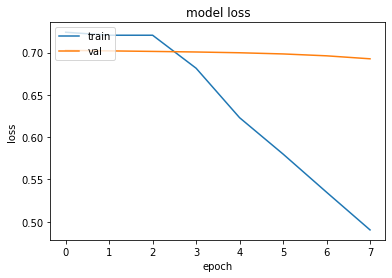

In [70]:
plt.plot(train_losses)
plt.plot(val_losses)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [71]:
test_df = test_df.reset_index(drop=True)

In [72]:
test_dataset = EasyVQADataset(
                           df=test_df,
                           image_encoder = image_encoder,
                           text_encoder = text_encoder
                           )

In [75]:
device = "cuda:0"
model.load_state_dict(torch.load('epoch_6.model'))
model.to(device)

EasyVQAEarlyFusion(
  (dropout): Dropout(p=0.3, inplace=False)
  (fc1): Linear(in_features=768, out_features=256, bias=True)
  (bn1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (classifier): Linear(in_features=256, out_features=2, bias=True)
  (relu_f): ReLU()
  (sigmoid_f): Sigmoid()
)

In [76]:
dataloader_test = DataLoader(test_dataset, 
                            sampler=SequentialSampler(test_dataset), 
                            batch_size=64)

_, preds, truths, confidence = evaluate(dataloader_test)

In [77]:
print("Test Acc with ViT: " , accuracy_score_func(preds,truths))

Test Acc with ViT:  0.5


In [78]:
pred_df = pd.DataFrame({"Prediction":preds, "GroundTruth":truths, "Confidence":confidence})

In [79]:
test_results_df = pd.concat([test_df, pred_df], axis=1)

In [80]:
idx2label = {v:k for k, v in label2idx.items()}
idx2label

{0: 'Invoice', 1: 'Discharge_Summary'}

In [81]:
dmap = {0: 'Invoice', 1: 'Discharge_Summary'}

In [82]:
test_results_df['pr'] = test_results_df['Prediction'].map(dmap)
test_results_df['gt'] = test_results_df['GroundTruth'].map(dmap)

In [83]:
test_results_df['PredAnswer'] = test_results_df['Prediction'].map(idx2label)

In [84]:
test_results_df

,Unnamed: 0,Image_Path,labels,text,Prediction,GroundTruth,Confidence,pr,gt,PredAnswer
0,165,/home/dkuwarbi/docI/images_forged/OC-22-1002-6...,0,lbTZasoHoT9ug= S55t > ON abegseees* abed axau ...,1,0,0.515210,Discharge_Summary,Invoice,Discharge_Summary
1,23,/home/dkuwarbi/docI/images_forged/210009077Pdi...,1,"Boo Bages®SUPRIYA HOSPITAL#15/1, Ayyappaswamy ...",1,1,0.517324,Discharge_Summary,Discharge_Summary,Discharge_Summary
2,213,/home/dkuwarbi/docI/images_forged/OC-22-1002-6...,1,£450 ¢ a6egwyhoYy 4G.SES ANSAO WIGAN IO BNYN *...,1,1,0.515960,Discharge_Summary,Discharge_Summary,Discharge_Summary
3,376,/home/dkuwarbi/docI/images_forged/OC-22-1002-6...,0,C=} SANGHAMITHRAHOSPITALS DAdvances Grand Tota...,1,0,0.513155,Discharge_Summary,Invoice,Discharge_Summary
4,249,/home/dkuwarbi/docI/images_forged/OC-22-1002-6...,0,"7)Yeerot CIMS,- rama nest wrwricims.or8 crgg F...",1,0,0.515532,Discharge_Summary,Invoice,Discharge_Summary
5,65,/home/dkuwarbi/docI/images_forged/210014237P f...,0,GST INVOICEUTKARSH MEDICAL STORE14-A (I1)-C BA...,1,0,0.514157,Discharge_Summary,Invoice,Discharge_Summary
6,374,/home/dkuwarbi/docI/images_forged/OC-22-1002-6...,0,«: [GHAMITHRAHos!- HOSPITALS(N~1002-5198266——I...,1,0,0.513277,Discharge_Summary,Invoice,Discharge_Summary
7,263,/home/dkuwarbi/docI/images_forged/OC-22-1002-6...,1,"Patient Name ;Mr, NISHIKANT KOLTEHome Quaranti...",1,1,0.515278,Discharge_Summary,Discharge_Summary,Discharge_Summary
8,203,/home/dkuwarbi/docI/images_forged/OC-22-1002-6...,1,worsuys ann) — urorswnraue > — -ABeygo SERN AA...,1,1,0.514678,Discharge_Summary,Discharge_Summary,Discharge_Summary
9,381,/home/dkuwarbi/docI/images_forged/OC-22-1501-6...,1,96909 99886 '6S199 99906 : aIIgo/W)€9009¢ - nu...,1,1,0.516727,Discharge_Summary,Discharge_Summary,Discharge_Summary


In [87]:
from sklearn.metrics import classification_report,confusion_matrix

In [88]:
print(confusion_matrix(test_results_df['pr'],test_results_df['gt']))

[[19 19]
 [ 0  0]]
